## Part 1

We are scraping Youtube's trending page for the most current trends uploaded. We are using Beautiful Soup to parse the appropriate classes on the webpage and finding their locations. A total of three lists are used to append each one for total video views, uploader name, and the title of the video. In the view list, we want to locate the total viewers by finding a specific class after parsing the data. In the name list, we are appending the youtuber's class. In the title list, a loop is used to collect the total number of videos presented on the webpage. 


In [35]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from bs4 import BeautifulSoup
import csv
import requests
import re

#Parsing data
response = requests.get('https://www.youtube.com/feed/trending').text
soup = BeautifulSoup(response,'lxml')
title = soup.findAll(class_='yt-uix-tile-link yt-ui-ellipsis yt-ui-ellipsis-2 yt-uix-sessionlink spf-link')
totalli = soup.findAll(True,{"class":"yt-lockup-meta"})
totaltubs = soup.findAll(True,{"class":"yt-uix-sessionlink spf-link"})

n=0
listnum = 0
viewlist = []
viewsnumlist = []

#list for Views
for li in totalli:
    for view in li.findAll('li'):
        views1 = view.get_text()
        if 'ago' in views1:
            continue
        else:
            viewlist.append(views1)  
            
#Convert views to number format for Pandas operations 
num = [re.findall(r'\d+',i.replace(',','')) for i in viewlist]

for viewnum in num:
    for viewnum2 in viewnum:
        viewsnum = int(viewnum2)
        viewsnumlist.append(viewsnum) 
        
#List for Time when Video uploaded
videotimelist = []
for li in totalli:
    for time in li.findAll('li'):
        video = time.get_text()
        if 'views' in video:
            continue
        else:
            videotimelist.append(video)

            
#list for Youtuber name
name = []
for items in totaltubs:
    youtuber = items.get_text().replace('\n','')
    name.append(youtuber)
del name[::2]

print('{:^60}\n-------------------------------------------------------------------'.format('Current Trends on Youtube'))

#List for Video title 
titlelist = []
for i in title:
    if i.get('title') is None:
        continue
    else:
        title2 = i.get_text()
        titlelist.append(title2)
        
#List for Video duration
video_time = []
time = soup.find_all('span',class_='video-time')
for minutes in time:
    get_time = minutes.get_text()
    video_time.append(get_time)
    

#Loop when Video title length is not the same as Youtuber name and View length 
if len(titlelist) != len(name) and len(titlelist) != len(viewlist) and len(titlelist)!=len(video_time) and len(titlelist)!=len(viewsnumlist) and len(titlelist)!= len(videotimelist):
    del viewlist[4:10], name[4:10], video_time[4:10], videotimelist[4:10], viewsnumlist[4:10], titlelist[3:4]
    
for i in range(len(name)):
        n+=1
        print(n,titlelist[listnum],'\n',
              'Youtuber:',name[listnum],'----- video views:', viewlist[listnum],'\n')
       
        listnum+=1
        

       
    

                 Current Trends on Youtube                  
-------------------------------------------------------------------
1 Henry VIII - OverSimplified 
 Youtuber: OverSimplified ----- video views: 2,138,022 views 

2 Obi-Wan Kenobi VS Kakashi (Star Wars VS Naruto) | DEATH BATTLE! 
 Youtuber: DEATH BATTLE! ----- video views: 1,380,914 views 

3 BABY MAMA DANCE (BFF EDITION) 
 Youtuber: Alondra & Elsy ----- video views: 640,618 views 

4 Space Force | Official Teaser | Netflix 
 Youtuber: Netflix ----- video views: 784,084 views 

5 StaySolidRocky- Party Girl (Official Music Video) 
 Youtuber: StaySolid Rocky ----- video views: 6,587,347 views 

6 Mortal Kombat 11 - The Epic Saga Continues 
 Youtuber: Mortal Kombat ----- video views: 219,950 views 

7 First-Look Xbox Series X Gameplay on Inside Xbox 
 Youtuber: Xbox ----- video views: 377,418 views 

8 Moneybagg Yo - Spin On Em (Official Music Video) ft. Fredo Bang 
 Youtuber: MoneyBagg Yo ----- video views: 679,600 views 

9 FaZ

In [36]:
#Length of each parsed list; check if they match
def length_value():
    print("Title:",len(titlelist))
    print("Views:",len(viewlist))
    print("Youtuber:",len(name))
    print("Duration:",len(video_time))
    print("Time_uploaded",len(videotimelist))
    print("Number list",len(viewsnumlist))
length_value()

Title: 90
Views: 90
Youtuber: 90
Duration: 90
Time_uploaded 90
Number list 90


## Part 2

After using BeautifulSoup to parse specific classes and create lists, we decided to change the title list. We added a new list to identify video titles and appended it. We then utilized Panda's DataFrame to create indexes and columns of the YouTuber name, video name, and views. With this capability, we can clean the dataset to any obtain desireable information. We used the describe method to identify the count, unique, top, and frequency values of given colums. We used the count method to locate the total variables available. We used the max and min method to display the maximum and minimum video viewers. We utilized numy's functionality to sort the desireable columns.

In [48]:
#np.sort(titlelist)

In [11]:
#np.sort(viewlist)

In [ ]:
#np.sort(name)

In [37]:
df = pd.DataFrame(name)
df.columns = ['Youtuber']
df['Video'] = titlelist
df['Views'] = viewsnumlist

print(df["Views"].max())
print(df["Views"].min())
print()
print(df.count())

29464130
63203

Youtuber    90
Video       90
Views       90
dtype: int64


## Part 3
After scraping data for video title, views, and Youtuber and creating a DataFrame, we decided to merge addition information from the website. Video duration, description, and time for when it was uploaded was scraped. This data are then appended to a list respectively. After, a second DataFrame was created from these lists. This new DataFrame is then merged with the first one to diplay the appropriate results. A sort values capability is used to set Youtubers as the index while arranging views from the highest to lowest.

In [38]:
#Renamed first column; Added 2 more columns (video title, views)
df = pd.DataFrame(name)
df.columns = ['Youtuber']
df['Video'] = titlelist
df['Views'] = viewsnumlist

#Created a second Dataframe (duration, time uploaded)
df2 = pd.DataFrame(titlelist)
df2.columns = ['Video']
df2['Duration'] = video_time
df2['Uploaded'] = videotimelist
  
#Merged both Datframes together
merge = pd.merge(df,df2)
merge.head()


,Youtuber,Video,Views,Duration,Uploaded
0,OverSimplified,Henry VIII - OverSimplified,2138022,26:47,23 hours ago
1,DEATH BATTLE!,Obi-Wan Kenobi VS Kakashi (Star Wars VS Naruto...,1380914,18:38,1 day ago
2,Alondra & Elsy,BABY MAMA DANCE (BFF EDITION),640618,7:37,22 hours ago
3,Netflix,Space Force | Official Teaser | Netflix,784084,2:44,8 hours ago
4,StaySolid Rocky,StaySolidRocky- Party Girl (Official Music Video),6587347,2:30,4 months ago


In [39]:
#Sort Video by Youtuber; eliminates duplicates
df3 = merge.sort_values(by='Youtuber')
df3.set_index(['Youtuber','Video'],drop=True)
df3.head()


,Youtuber,Video,Views,Duration,Uploaded
78,1804 Jackboy,Jackboy - Won't Understand (Official Video),935129,3:30,5 days ago
21,1theK (원더케이),[Teaser] IU(아이유) _ eight(에잇) (Prod.&Feat. SUGA...,3518998,0:41,1 day ago
84,2 Danny 2 Furious,Becoming The Ideal Man Of The Future,950286,19:11,3 days ago
41,ASTRO 아스트로,ASTRO 아스트로 - Knock(널 찾아가) M/V,2664642,3:29,1 day ago
23,Adult Swim,Rick and Morty x Wendy’s [ad],1839800,0:31,1 day ago


In [40]:
#Sorted views in ascending order
df3 = merge.sort_values(['Views','Youtuber'],ascending=False)
df3.set_index(['Youtuber','Video'],drop=True)
df3.head()


,Youtuber,Video,Views,Duration,Uploaded
67,Travis Scott,"THE SCOTTS, Travis Scott, Kid Cudi - THE SCOTT...",29464130,2:48,1 week ago
53,MrBeast,"$250,000 Influencer Rock, Paper, Scissors Tour...",25888677,28:00,Streamed 1 week ago
65,DaBaby,"DaBaby - ""JUMP"" feat NBA Youngboy (Official Vi...",25201017,5:05,2 weeks ago
66,Travis Scott,Travis Scott and Fortnite Present: Astronomica...,22075114,8:58,1 week ago
56,Juice WRLD,Juice WRLD - Righteous (Official Video),21093037,3:49,1 week ago


## Part 4

From the sorted dataframe after merging, we imported the data to a excel spreadsheet, eliminating any rows with 'Stream' contained in it. An option for user to search for videos based on uploaded time is included after reading the spreadsheet. After the search, a newly dataframe containing the same columns will appear based on the user's input setting.

In [41]:
#Takes out row if string contains 'Stream'
def import_excel():
    df3.to_excel("Youtube Trend.xlsx",sheet_name="Youtube Trending",index=False)
    df = pd.read_excel("Youtube Trend.xlsx","Youtube Trending")
    df = df[~df.Uploaded.str.contains("Stream")]
    df.to_excel("Youtube Trend.xlsx",sheet_name="Youtube Trending",index=False)
import_excel()


In [42]:
#Applied an input option for user to find time of videos uplaoded

df = pd.read_excel("Youtube Trend.xlsx","Youtube Trending")

user_input = int(float(input('Enter:\n1. Find videos uploaded less than 24 hours\n2. Find videos uploaded less then one week\n3. Find all videos uploaded\n')))

if user_input == 1:
    user_input = 'hours'
elif user_input == 2:
    user_input = 'day'
else:
    user_input=''

display = df[df.Uploaded.str.contains(user_input)]
display.head()



Enter:
1. Find videos uploaded less than 24 hours
2. Find videos uploaded less then one week
3. Find all videos uploaded
1


,Youtuber,Video,Views,Duration,Uploaded
35,OverSimplified,Henry VIII - OverSimplified,2138022,26:47,23 hours ago
40,CNN,Dr. Fauci to Chris Cuomo: I don't think people...,1534998,11:00,19 hours ago
53,Apex Legends,Apex Legends Season 5 – Fortune's Favor Launch...,1145292,2:28,4 hours ago
54,Inside Edition,What It’s Like to Be Stung by a Murder Hornet,1047025,2:02,22 hours ago
59,Fabio Wibmer,Home Office - Fabio Wibmer,885187,7:27,9 hours ago


## Part 5

Added a groupby function to group Videos through it's Views and Youtuber. The ascending numbers for Views is applied in part 4. This groupby function sorts the Views from the lowest views on top to highest at bottom.A pivot table is created through the desired index columns and Views as the value considering the data type is in int 64.

In [43]:
#Grouped videos by Views and Youtuber
df3.groupby(["Views","Youtuber"])["Video"].min().head(10)

Views   Youtuber             
63203   GregsGadgets             MacBook Pro 13" (2020) - Watch THIS Before You...
107284  Mashed                   Shoppers Are Boycotting Costco Right Now And H...
124916  SNOWTHAPRODUCT           Snow Tha Product - Pressure (Official Music Vi...
160486  forKINGANDCOUNTRY        for KING & COUNTRY - TOGETHER (feat. Kirk Fran...
199691  Strashme                 Q&A EPISODE 2 INSTANT INFLUENCER WITH JAMES CH...
217014  theneedledrop                  Drake - Dark Lane Demo Tapes MIXTAPE REVIEW
219950  Mortal Kombat                   Mortal Kombat 11 - The Epic Saga Continues
222892  Practical Engineering                                   What Is a Culvert?
229690  Migos ATL                               Migos - Taco Tuesday (Lyric Video)
230390  Daisy Marquez                             1 HOUR QUARANTINE TRANSFORMATION
Name: Video, dtype: object

In [44]:
#Pivot talbe for Views with indexes are Youtuber and Video
pd.pivot_table(data=df3, index=["Youtuber","Video"],values="Views",dropna=True, fill_value=0).head(10)

Views
Youtuber          Video                                                      
1804 Jackboy      Jackboy - Won't Understand (Official Video)          935129
1theK (원더케이)      [Teaser] IU(아이유) _ eight(에잇) (Prod.&Feat. SUGA ...  3518998
2 Danny 2 Furious Becoming The Ideal Man Of The Future                 950286
ASTRO 아스트로        ASTRO 아스트로 - Knock(널 찾아가) M/V                       2664642
Adult Swim        Rick and Morty x Wendy’s [ad]                       1839800
Alondra & Elsy    BABY MAMA DANCE (BFF EDITION)                        640618
Apex Legends      Apex Legends Season 5 – Fortune's Favor Launch ...  1145292
                  Apex Legends | Stories from the Outlands – “Leg...  4184771
AzzyLand          The Craziest and Most Bizarre Shoes Ever !          1510089
Brandy            Brandy - Baby Mama (feat. Chance the Rapper) - ...   282582

## Part 6 

Here, Video duration is converted to an integer in order to function properly while utilizing a dataframe and plotting. After the covnersion, a new dataframe is created to append the newly formed Video duration dtype. A line graph is then created to compare the corrrelation between Video Views and Duration. The Y-axis shows the views in increments of 10 million, while the X-axis displays the video duration. The legend is located top right, indicating the color line for Views.

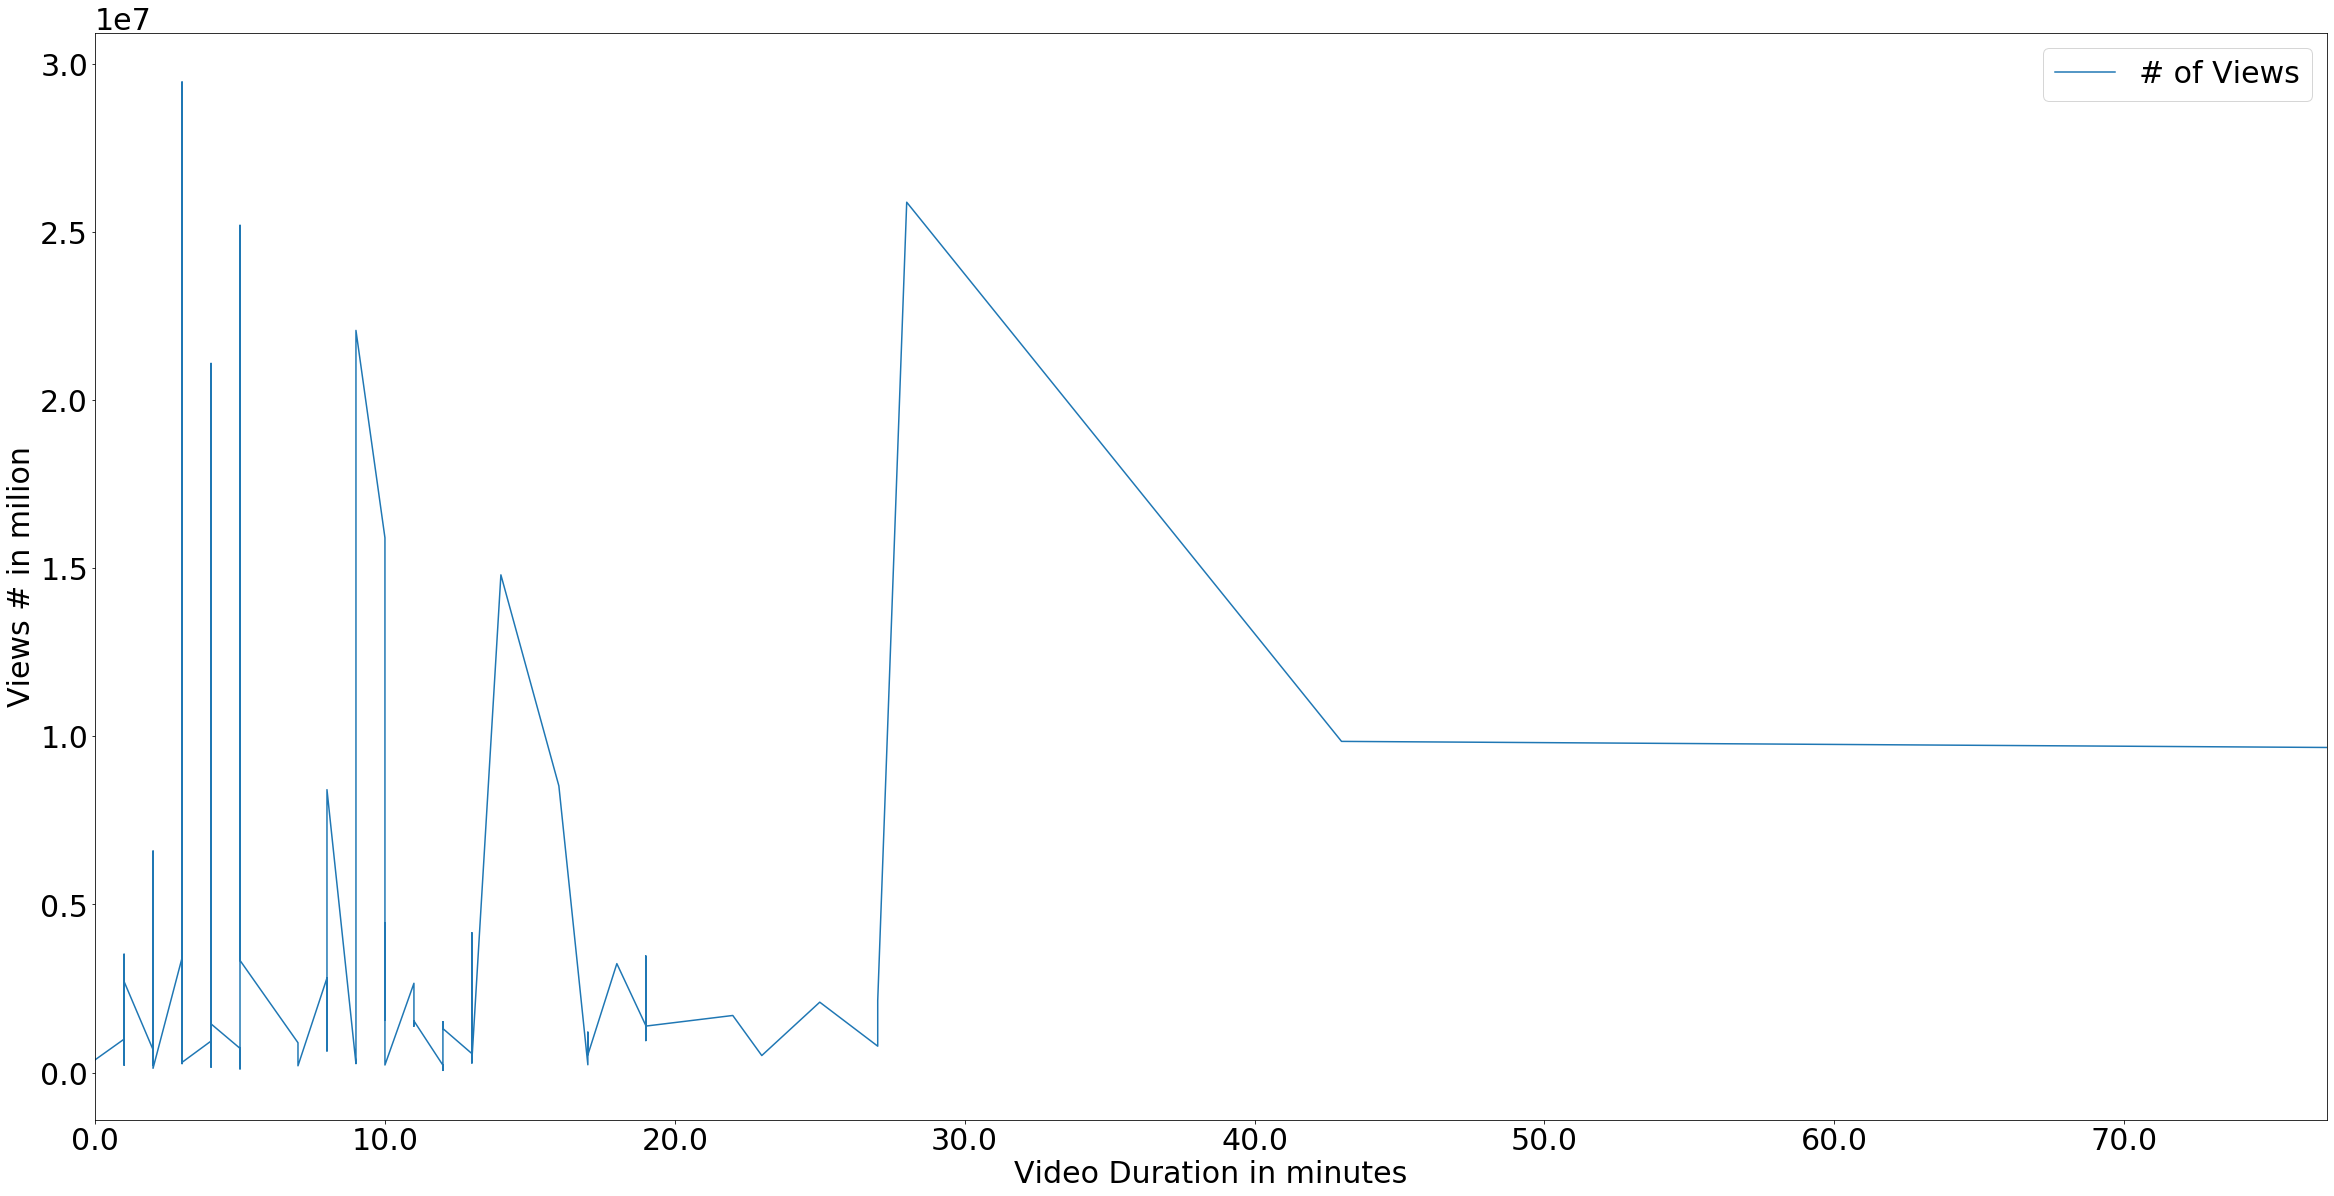

In [46]:
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
videoduration = []

for duration in video_time:
    try:
        durtime = datetime.strptime(duration, '%M:%S')
    except:
        durtime = datetime.strptime(duration, '%H:%M:%S')
    min_ = round(durtime.hour*60 + durtime.minute*1 + durtime.second/60)
    videoduration.append(min_)

graph1 = pd.DataFrame(name)
graph1.columns = ['Youtuber']
graph1['Video'] = titlelist
graph1['Views'] = viewsnumlist
graph1['Duration(mins)'] = videoduration
sortg = graph1.sort_values(by='Duration(mins)')

ax = sortg.plot(x= 'Duration(mins)',y='Views',kind='line')
start, end = ax.set_xlim(0)
ax.xaxis.set_ticks(np.arange(start,end,10))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.set_xlabel("Video Duration in minutes")
ax.set_ylabel("Views # in milion")
ax.legend(["# of Views"])
plt.rcParams['figure.figsize']= (40,20)
plt.rcParams.update({'font.size': 30})
fig = ax.get_figure()
fig.savefig('Views vs Duration.jpg')
plt.show()

In [196]:
print(graph1.dtypes)

Youtuber          object
Video             object
Views              int64
Duration(mins)     int64
dtype: object


## References

Regular expressions operations:  https://docs.python.org/3/library/re.html

Pandas Dataframe:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

Merge Dataframe:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

Groupby Dataframe:  https://pandas.pydata.org/pandas-docs/version/0.21.1/generated/pandas.DataFrame.groupby.html

Datetime Dataframe:  https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

Datetime Dateframe:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Matplotlib:  https://matplotlib.org/3.2.1/api/widgets_api.html#module-matplotlib.widgets

Excel Dataframe:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html


